Original Data Shape: (205, 26)
Columns: ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

First 5 rows:
   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible        

<ipython-input-77-24e57af371be>:66: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-77-24e57af371be>:70: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

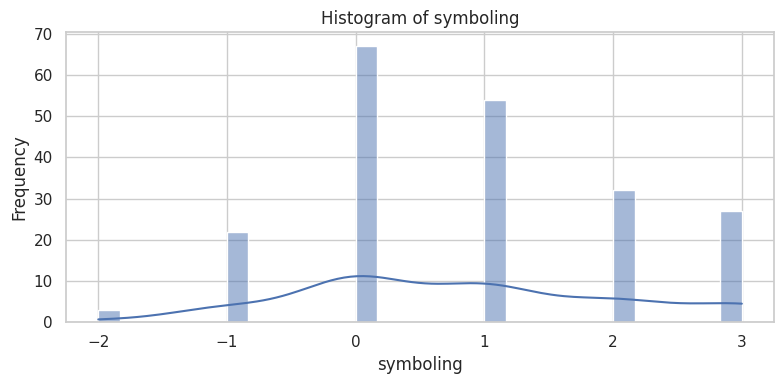

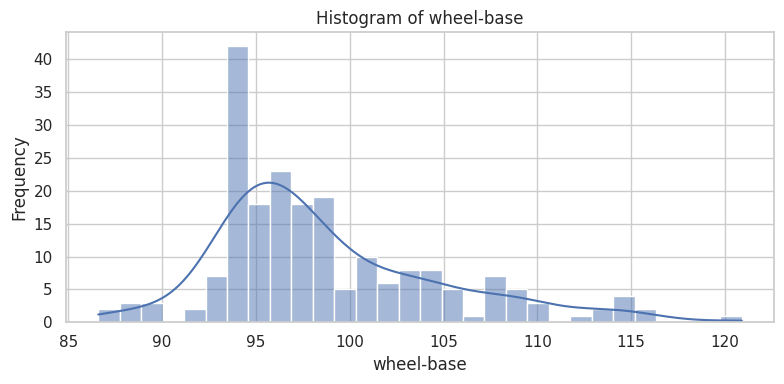

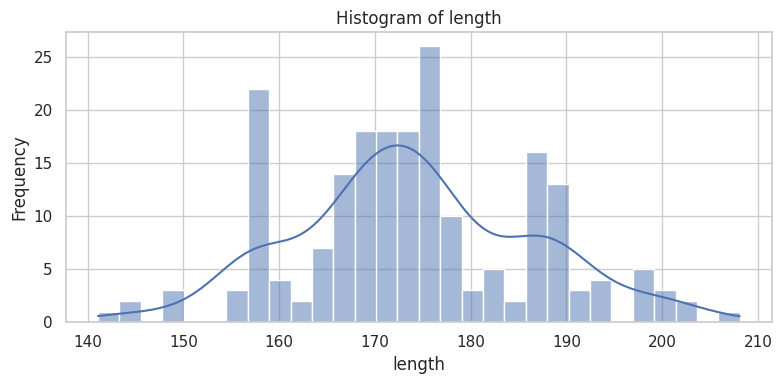

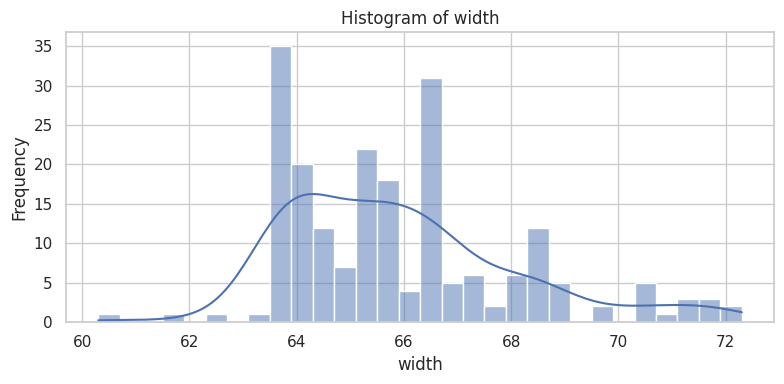

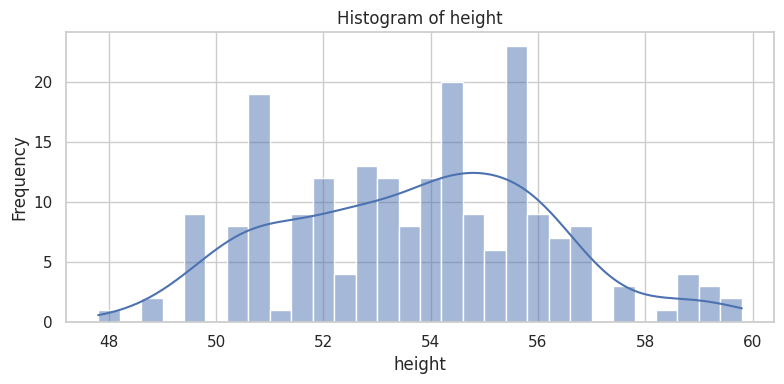

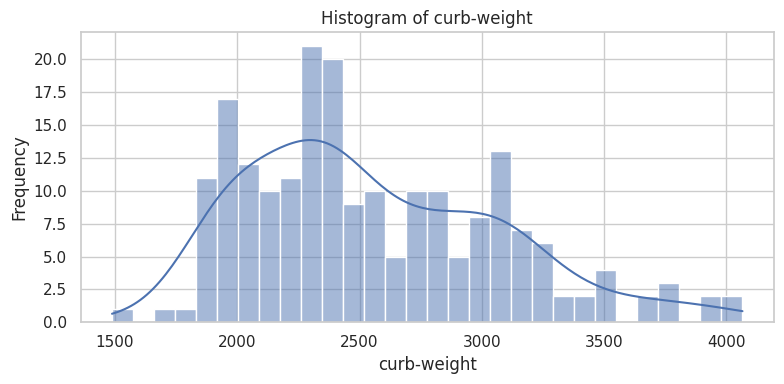

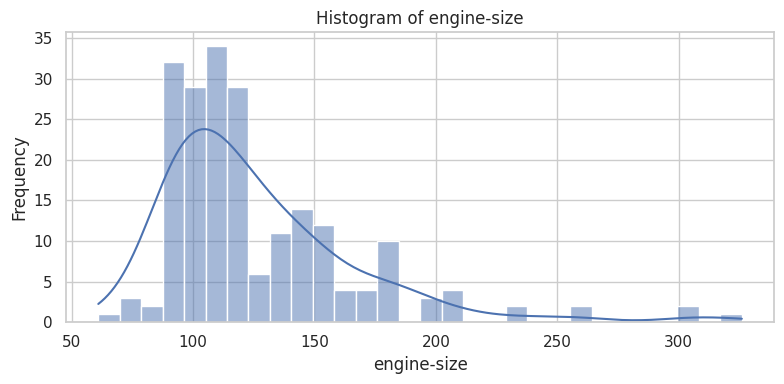

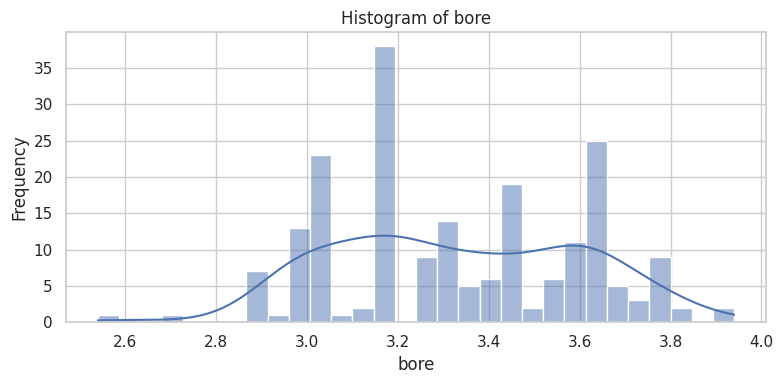

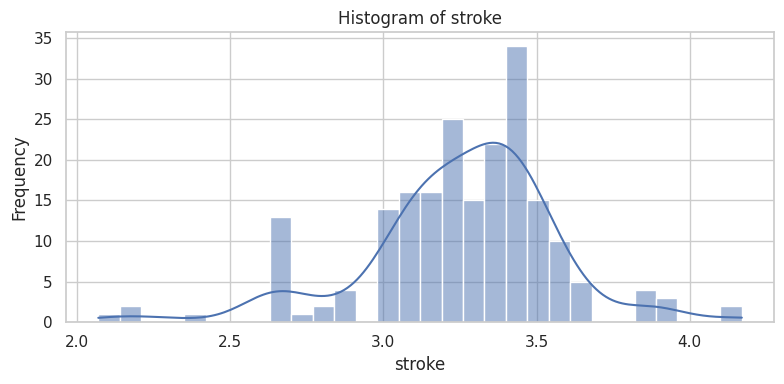

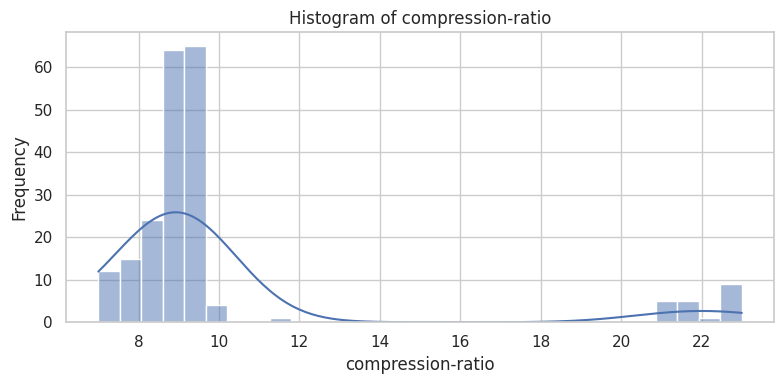

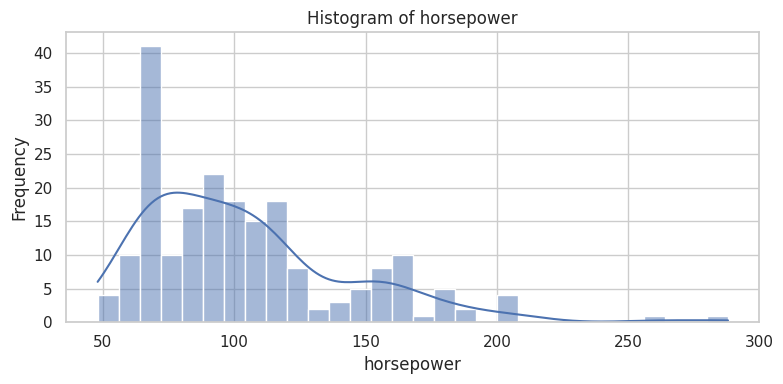

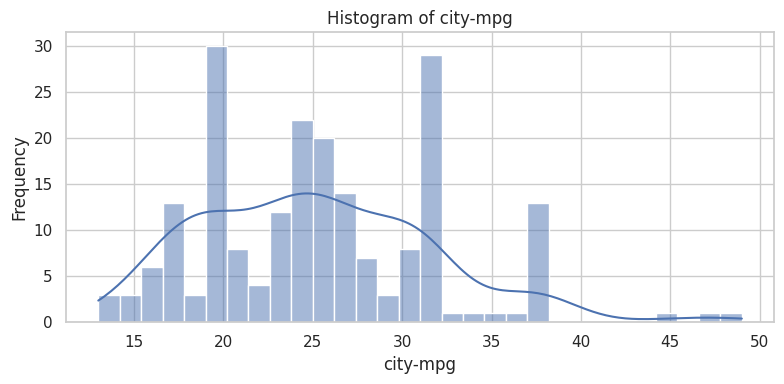

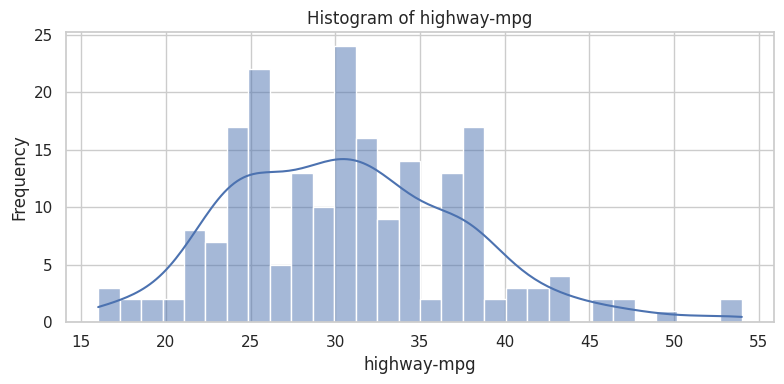

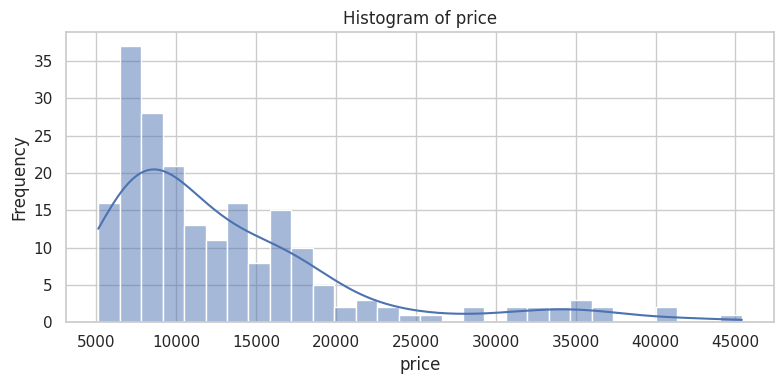

<ipython-input-77-24e57af371be>:96: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




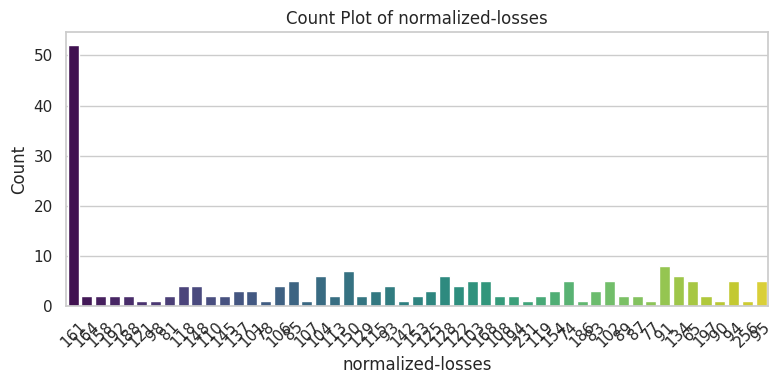

<ipython-input-77-24e57af371be>:96: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




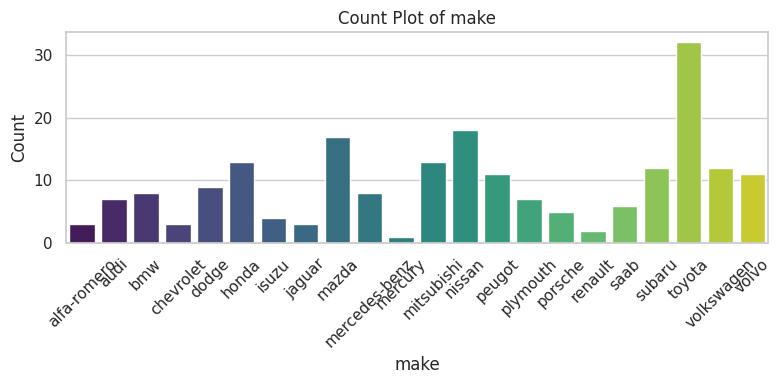

<ipython-input-77-24e57af371be>:96: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




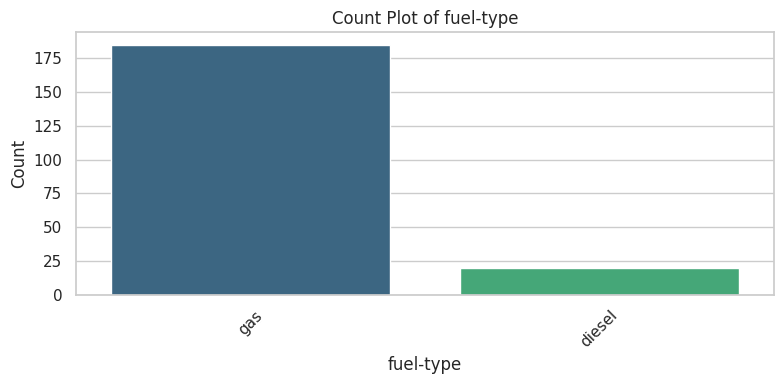

<ipython-input-77-24e57af371be>:96: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




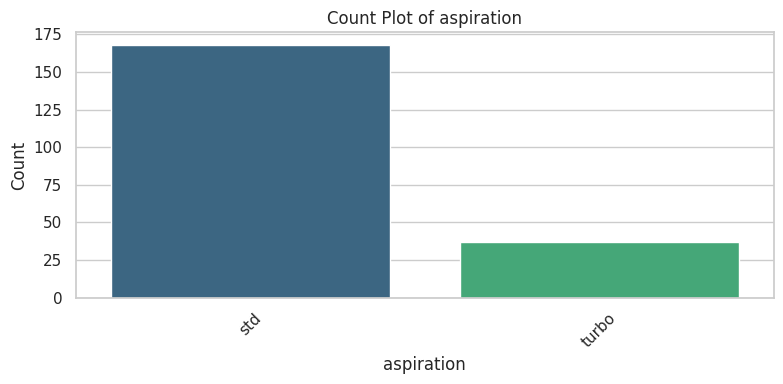

<ipython-input-77-24e57af371be>:96: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




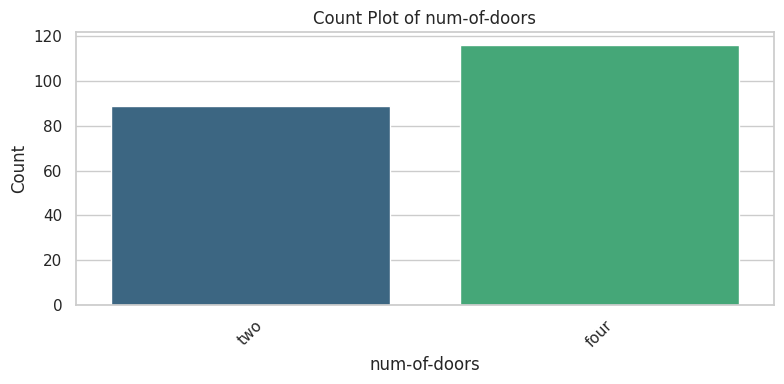

<ipython-input-77-24e57af371be>:96: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




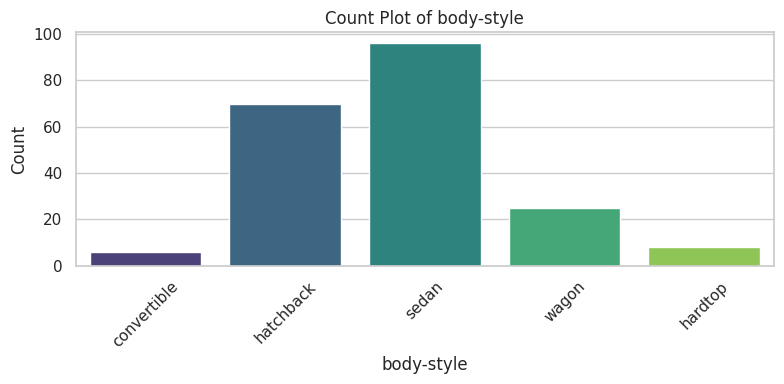

<ipython-input-77-24e57af371be>:96: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




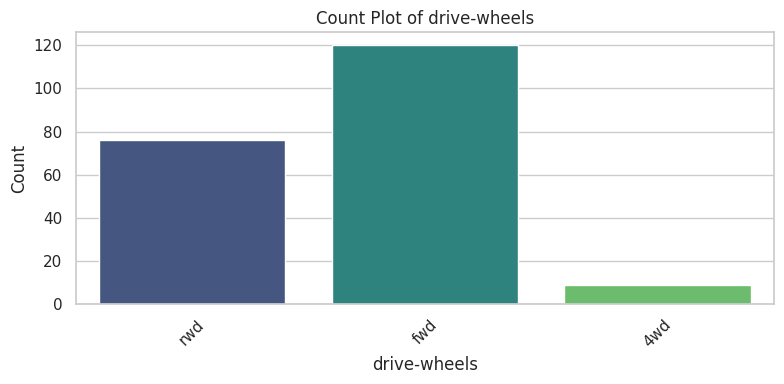

<ipython-input-77-24e57af371be>:96: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




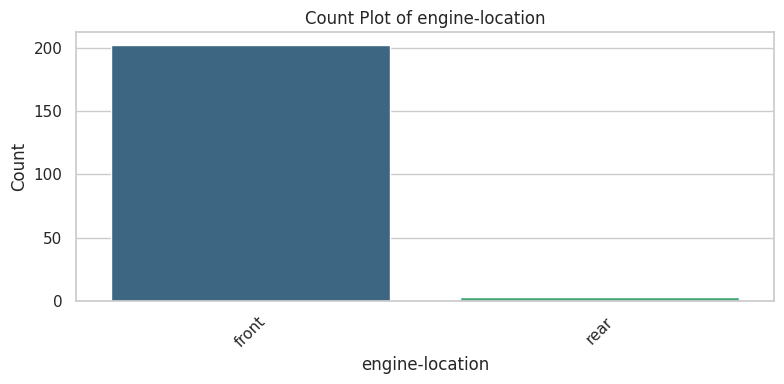

<ipython-input-77-24e57af371be>:96: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




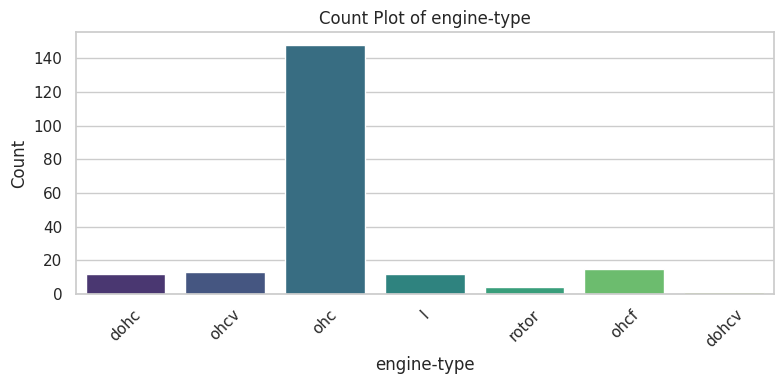

<ipython-input-77-24e57af371be>:96: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




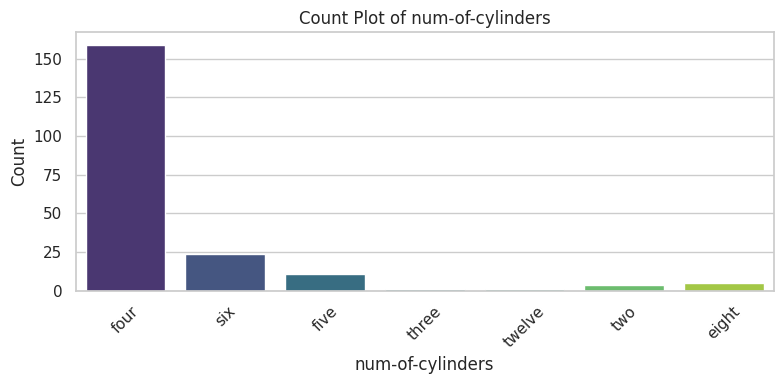

<ipython-input-77-24e57af371be>:96: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




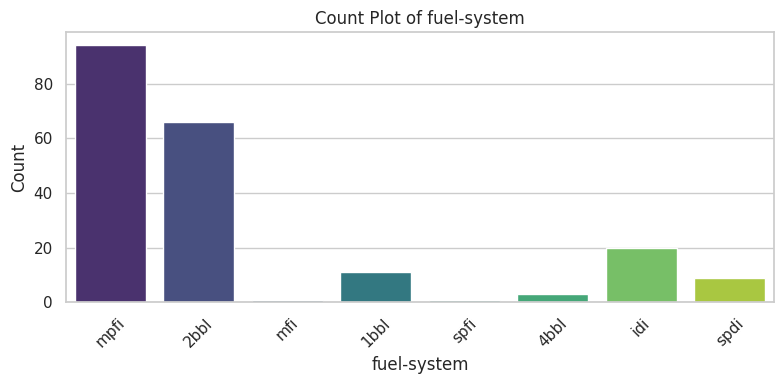

<ipython-input-77-24e57af371be>:96: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




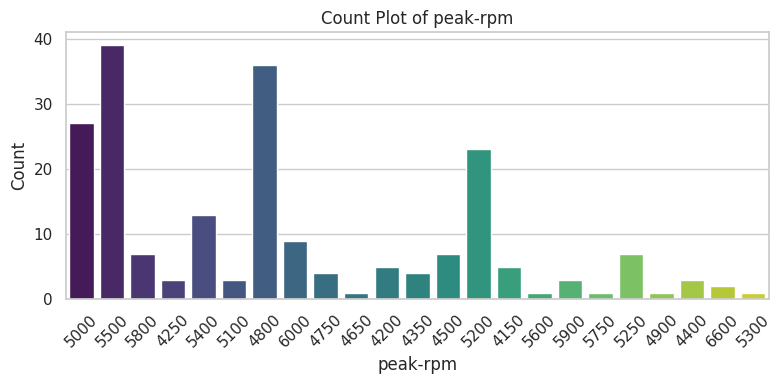

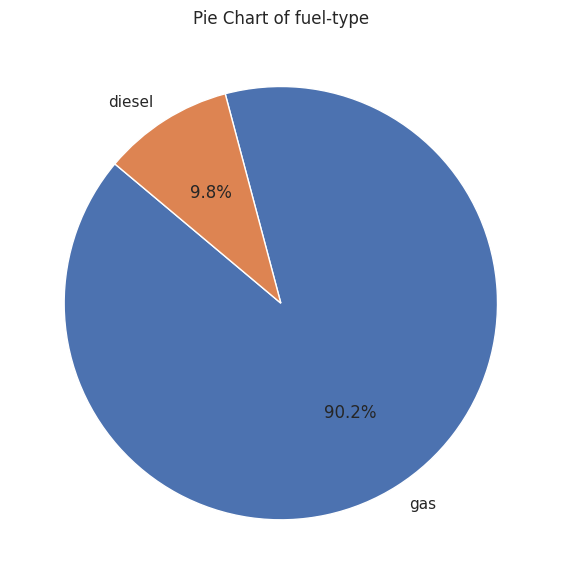

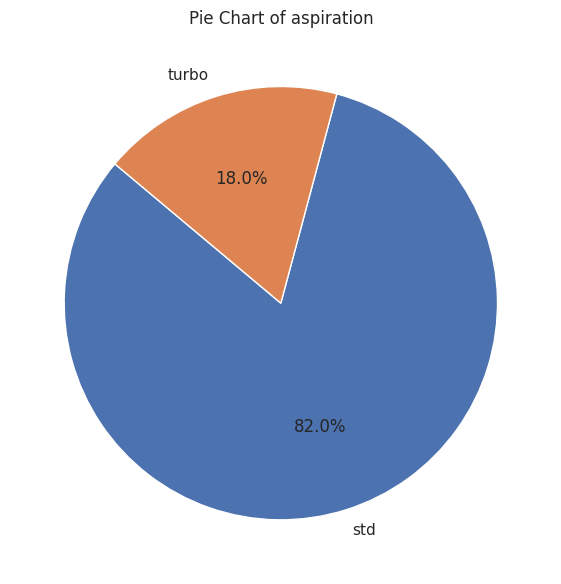

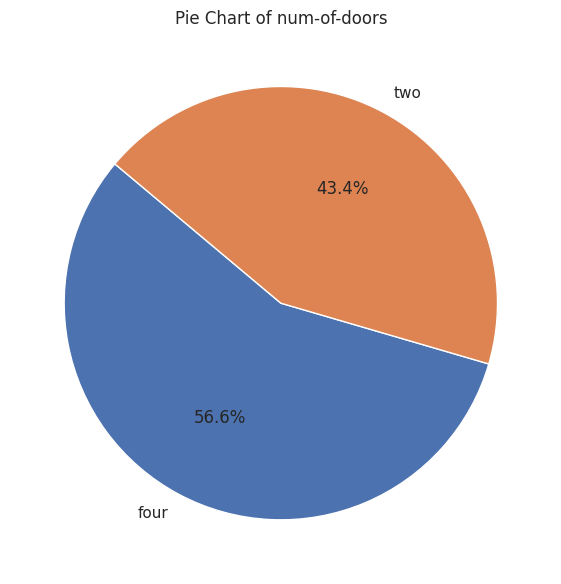

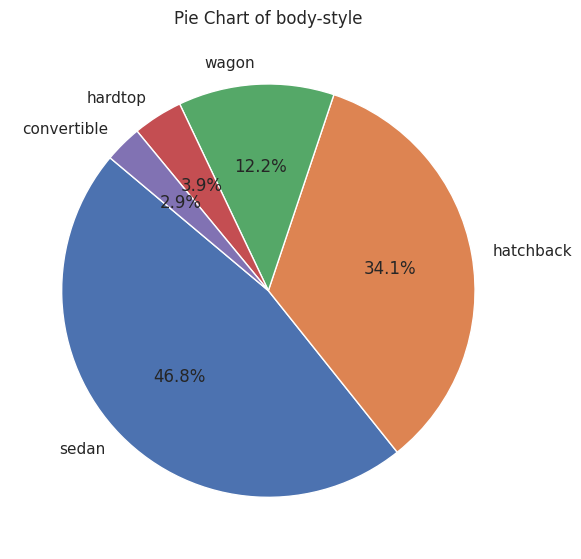

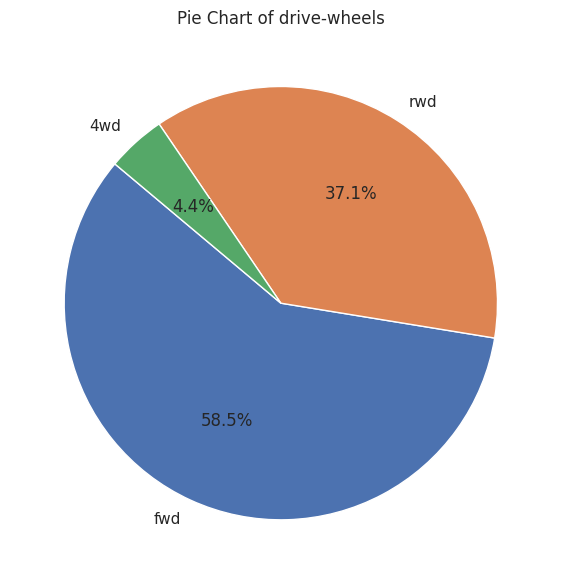

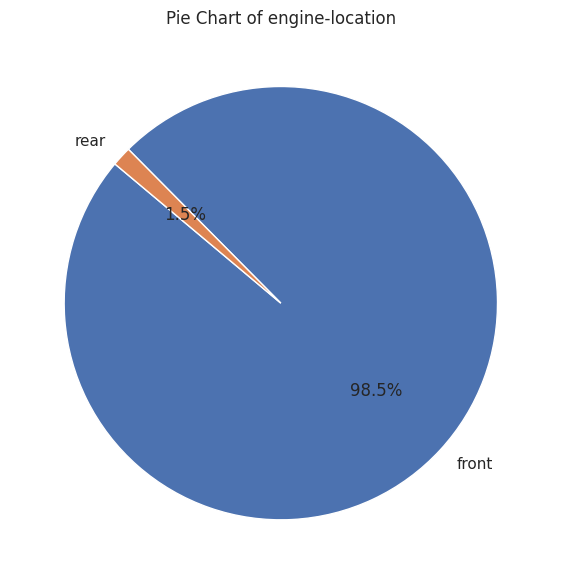

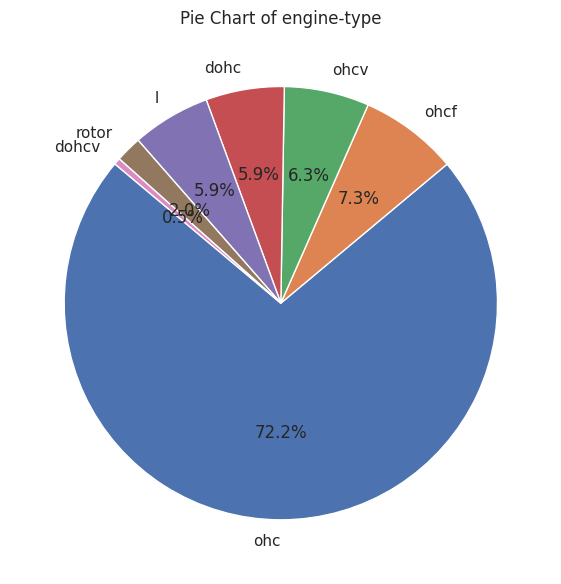

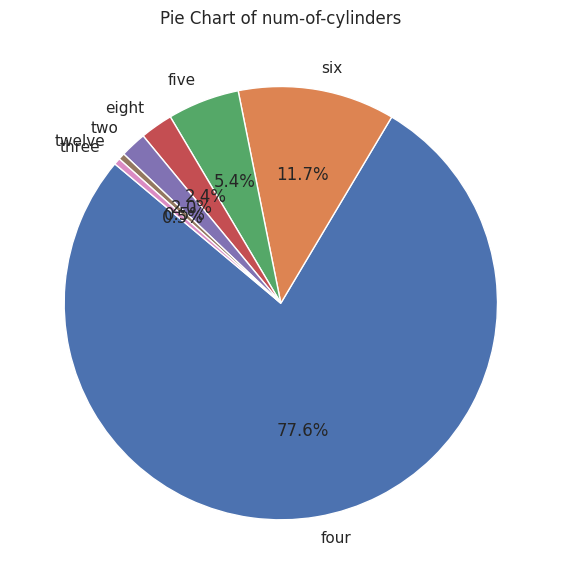

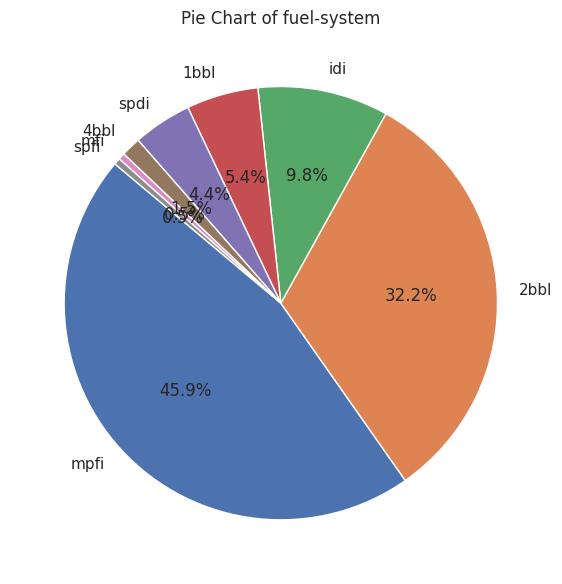

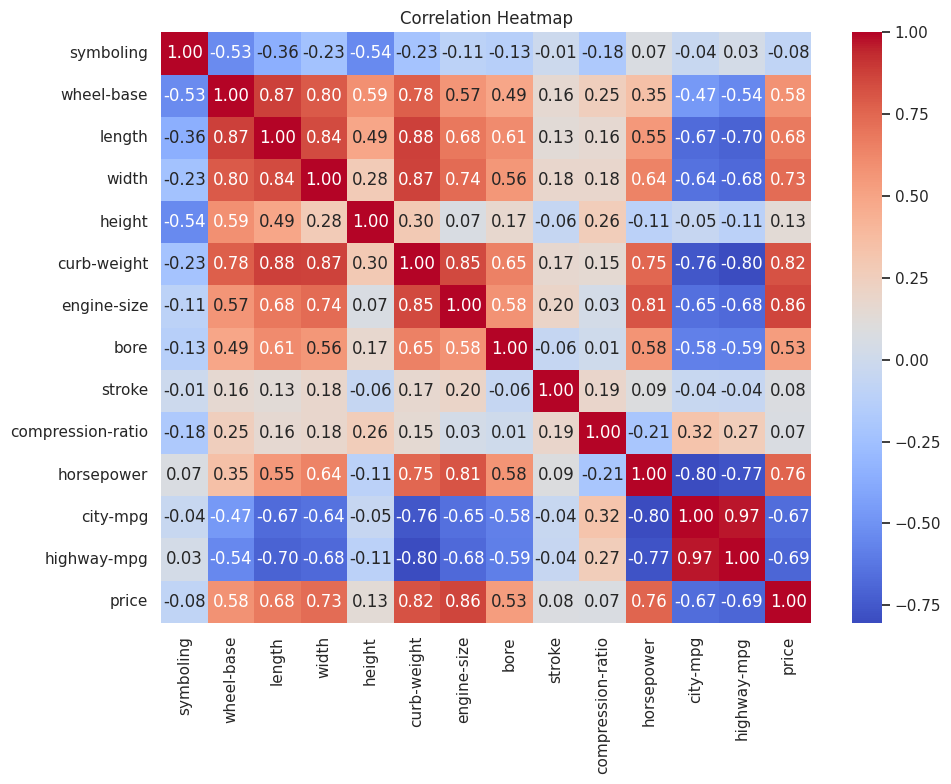

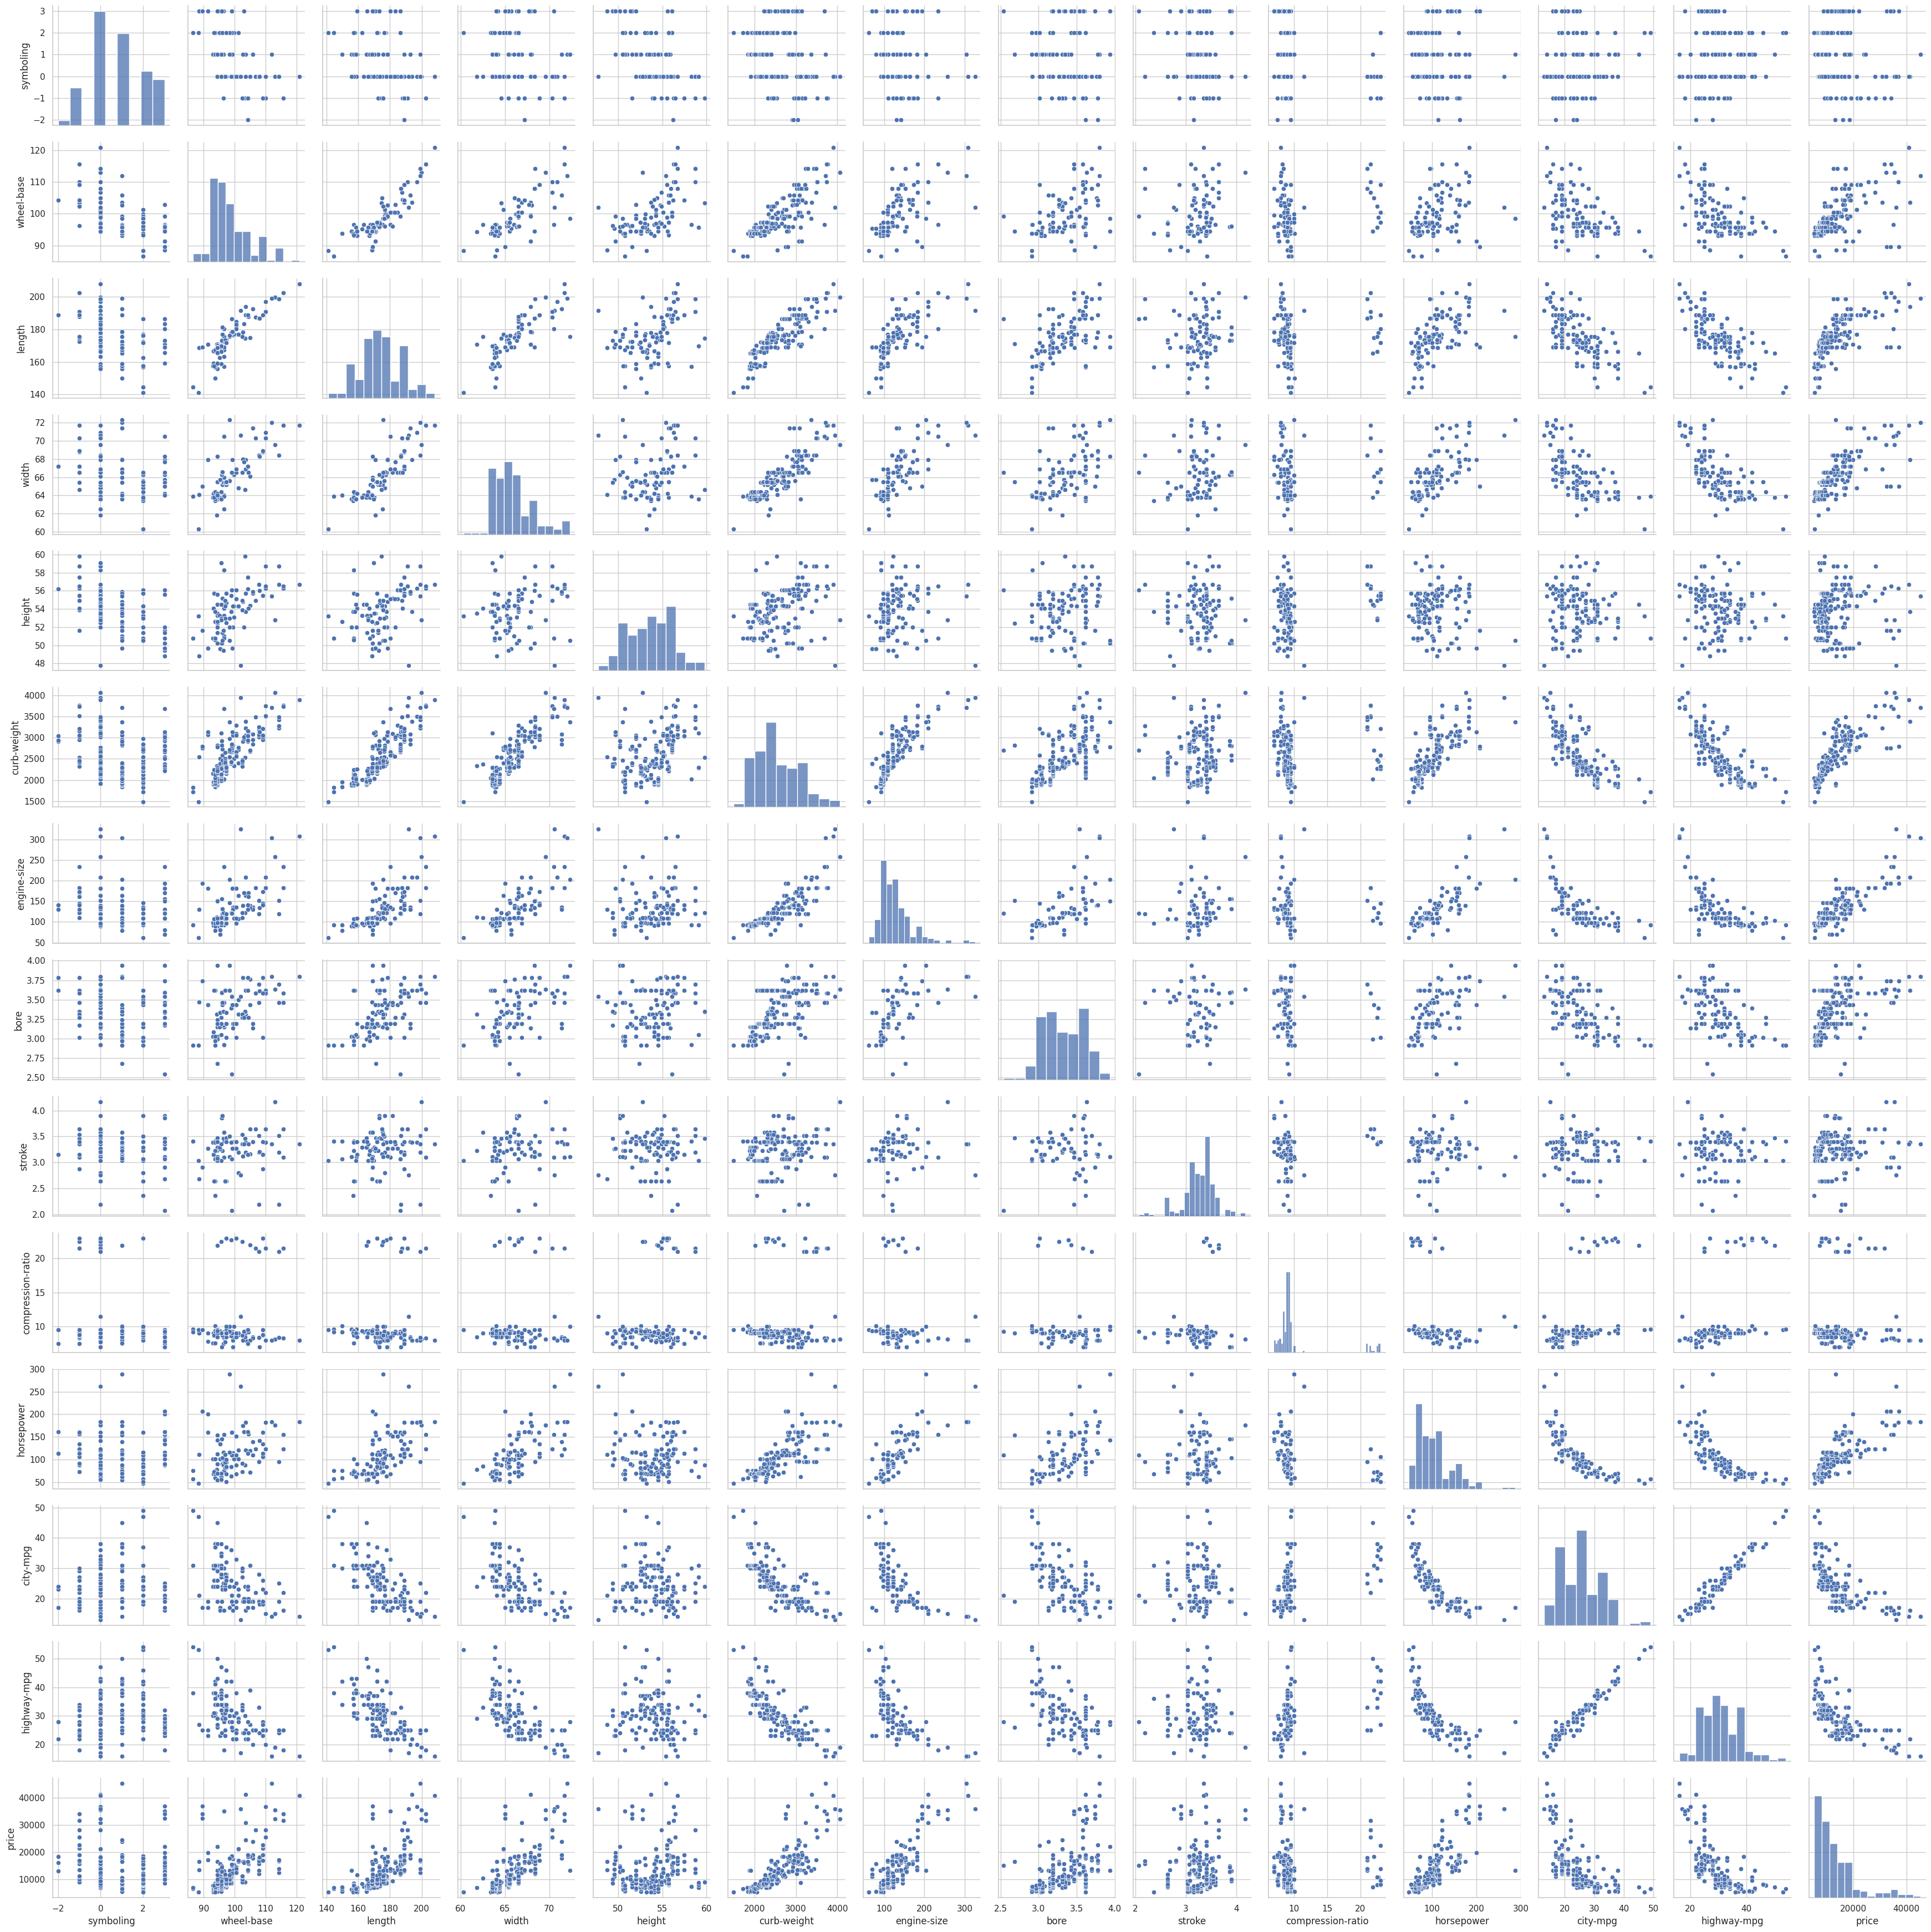


EDA complete!


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid", context="notebook")

# 1. Load the Data
data_file = "Automobile_data.csv"
df = pd.read_csv(data_file)

print("Original Data Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

# 2. Data Cleaning and Processing
# (a) Standardize column names: lowercase and replace spaces with underscores.
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
print("\nCleaned Column Names:", df.columns.tolist())

# (b) Replace common missing value indicators (e.g., "?") with NaN.
df.replace("?", np.nan, inplace=True)

# (c) Check missing values.
print("\nMissing values per column (before imputation):")
print(df.isnull().sum())

# (d) Convert columns that should be numeric.
# Adjust the list below based on your dataset's known numeric columns.
numeric_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height',
                'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
                'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

print("\nMissing values per column (after conversion):")
print(df.isnull().sum())

# (e) Impute missing values:
#   - For numeric columns, fill with the mean.
#   - For categorical columns, fill with the mode.
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in numeric_cols:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

print("\nMissing values per column (after imputation):")
print(df.isnull().sum())

# 3. Exploratory Data Analysis (EDA)
print("\nDescriptive Statistics:")
print(df.describe())

# (a) Histograms for Numeric Columns.
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# (b) Count Plots for Categorical Columns.
cat_columns = df.select_dtypes(include=["object"]).columns.tolist()
for col in cat_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# (c) Pie Charts for Categorical Columns (if the number of unique values is small).
for col in cat_columns:
    counts = df[col].value_counts()
    if len(counts) <= 10:
        plt.figure(figsize=(6, 6))
        plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=140)
        plt.title(f"Pie Chart of {col}")
        plt.tight_layout()
        plt.show()

# (d) Correlation Heatmap for Numeric Features.
plt.figure(figsize=(10, 8))
corr_matrix = df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# (e) Pairplot for Numeric Features.
sns.pairplot(df[num_columns])
plt.tight_layout()
plt.show()

print("\nEDA complete!")
